In [37]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

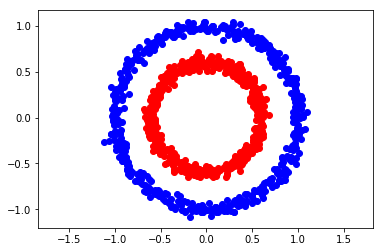

In [39]:
# CREAR EL DATASET

n = 1000 #Cantidad de puntos
p = 2  #Cantidad de características que puede tener cada punto (si fueran personas una seria la edad y otra la altura, ponele)

X, Y = make_circles(n_samples=n, factor=0.6, noise=0.04) #Crear los dos circulos que guian donde iran los puntos que queden

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="blue") #Dibujamos los puntitos azules
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="red")  #Dibujo los puntitos rojos
plt.axis("equal")
plt.show()

In [40]:
# CLASE DE LA CAPA DE LA RED

class neural_layer(): #La idea es pensar cada capa de una red como un modulo, como una clase
 
  def __init__(self, n_conn, n_neur, act_f): #n_conn (numero de conexiones con la capa anterior) n_neur numero de neuronas
        #act_f funcion de activacion de la capa
    
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1  #se inicializa el parametro de bias de forma aleatoria
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1  ##se inicializan los parametros w de forma aleatoria

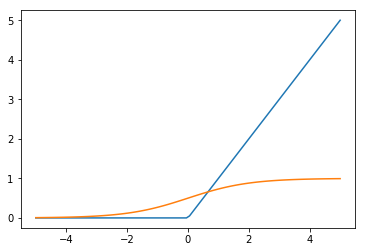

In [41]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))  #Esto son dos funciones. sigm[0] es la sigmoide y sigm[1] es su derivada
                                # (la derivada es util para usarla luego en backpropagation)

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))
plt.plot(_x, sigm[0](_x))

In [42]:
# DEFINO RED NEURONAL

l0 = neural_layer(p, 4, sigm) #Primer capa
l1 = neural_layer(4, 8, sigm) #Segunda capa
# ... y asi susesivamente

#Pero lo ideal es hacer lo siguiente: crear una clase red neuronal y hacer todo iterativamente

#CLASE DE RED NEURONAL

def create_nn(topology, act_f): #topology es un vector en donde se especifican la cantidad de neuronas de cada capa
    #por ejemplo topology = [p,8,1] es decir la primer capa tiene 2 neuronas, la seguna 8 y la ultima 1
    #la ultima tiene 1 porque el resultado es binario :D
    #con esto todas las capas tendran la misma funcion de activacion pero en la practica esto no necesariamente es asi
    
  nn = []
  
  for l, layer in enumerate(topology[:-1]): #l es el indice y layer es el objeto. el [:-1] es para que corra hasta el ultimo valor
    #sin incluirlo
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f)) #Aqui se le van agregando al vector nn
    #las capas de forma iterativa
    
  return nn

In [49]:
# CREO LA RED

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)  


In [44]:
# FUNCION DE COSTE

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #son dos funciones, la segunda es la derivada de la primera
           lambda Yp, Yr: (Yp - Yr))

In [45]:
#DEFINO METODO DE ENTRENAMIENTO

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True): #parametros de la funcion: red a entrenar
                                                                                    #datos de entrada, de salida
                                                                                    #funcion de coste, learning rate
                                                                                    #y el booleano train que indica si
                                                                                    #estamos entrenando o solo evalundo
  
  out = [(None, X)]
  
  # Forward pass
  for l, layer in enumerate(neural_net):  #se itera capa por capa, l es el indice y layer es la capa en si
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #Suma ponderada de la capa en cuestion
    a = neural_net[l].act_f[0](z) #funcion de activacion en la capa en cuestion
  
    out.append((z, a))  #se van acumulando las salidas en la variable out
    
 #Listo, ya fui para adelante, le meti datos y obtuve la salida. Ahora solo falta hacer backpropagation en el caso de que
#se desee efectivamente entrenar. Si train es true entonces:


  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))): #ciclo for hacia atras
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1: #Estamos en la ultima capa?
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) #Computo error de la ultima capa (ver carpeta)
      else: #Si no es la ultima capa:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a)) #Retropropago a la capa anterior (ver carpeta)
       
      _W = neural_net[l].W
 
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr #Formula copy pasteada :D
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]

In [50]:
#ENTRENO LA RED

train(neural_net, X, Y, l2_cost, 0.5)
print("")

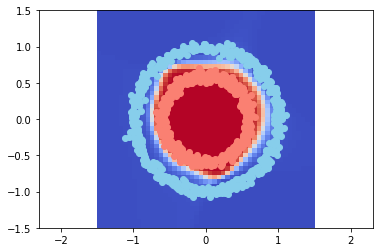

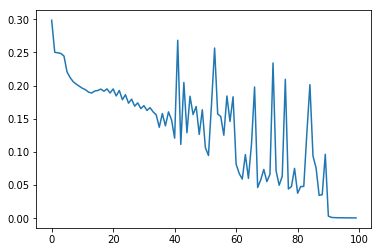

In [51]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  